
# Simple Linear Regression

## Introduction to Regression

Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is widely used in machine learning for predictive modeling and forecasting.

The most basic form of regression is **linear regression**, which assumes a linear relationship between the dependent variable and the independent variable(s). In this section, we will focus on simple linear regression, which involves a single independent variable.

## Simple Linear Regression

Simple linear regression is a statistical method that models the relationship between a dependent variable and a single independent variable by fitting a linear equation to the observed data.

The equation of a simple linear regression model can be expressed as: $$y = \beta_0 + \beta_1 x + \varepsilon$$ where:

-   $y$ is the dependent variable (the variable we want to predict),
-   $x$ is the independent variable (the feature used for prediction),
-   $\beta_0$ is the $y$-intercept (the value of $y$ when $x = 0$),
-   $\beta_1$ is the slope of the line (the change in $y$ for a one-unit change in $x$),
-   $\varepsilon$ is the error term (the difference between the observed and predicted values).

## Assumptions of Simple Linear Regression

Simple linear regression makes several key assumptions:

1.  **Linearity**: The relationship between the dependent and independent variable is linear.
2.  **Independence**: The observations are independent of each other.
3.  **Homoscedasticity**: The residuals (errors) have constant variance across all levels of the independent variable.
4.  **Normality**: The residuals are normally distributed.

## Evaluation Metrics

Evaluation metrics are used to assess the performance of a regression model. Common metrics include:

-   **Mean Absolute Error (MAE)**: The average of the absolute differences between predicted and actual values. $$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$ where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $n$ is the number of observations.
-   **Mean Squared Error (MSE)**: The average of the squared differences between predicted and actual values. $$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$ where $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $n$ is the number of observations.
-   **Root Mean Squared Error (RMSE)**: The square root of the mean squared error, providing an error metric in the same units as the dependent variable. $$RMSE = \sqrt{MSE}$$ where $MSE$ is the mean squared error.
-   **R-squared ($R^2$)**: The proportion of variance in the dependent variable that can be explained by the independent variable(s). It ranges from 0 to 1, where 1 indicates a perfect fit. $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$ where $SS_{res}$ is the sum of squared residuals and $SS_{tot}$ is the total sum of squares.

## Practical Demonstration

We will now demonstrate how to implement simple linear regression using Python's `scikit-learn` library. We will use a synthetic dataset for this purpose.

-   Create a synthetic dataset following the equation $$y = 4 + 3x + \varepsilon$$

In [1]:
import numpy as np
np.random.seed(42)
X = np.linspace(-2, 2, 100).reshape(-1, 1)  # Independent variable
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable with noise

-   Create a `pandas.DataFrame` for ease of processing and visualization

In [2]:
import pandas as pd
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

-   Explore the newly created dataset

In [3]:
data.head()

,X,y
0,-2.000000,-1.503286
1,-1.959596,-2.017052
2,-1.919192,-1.109887
3,-1.878788,-0.113334
4,-1.838384,-1.749305


In [4]:
data.describe()

,X,y
count,1.000000e+02,100.000000
mean,1.643130e-16,3.896153
std,1.172181e+00,3.670850
min,-2.000000e+00,-2.337523
25%,-1.000000e+00,0.681941
50%,1.110223e-16,3.872699
75%,1.000000e+00,7.251063
max,2.000000e+00,10.018631


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


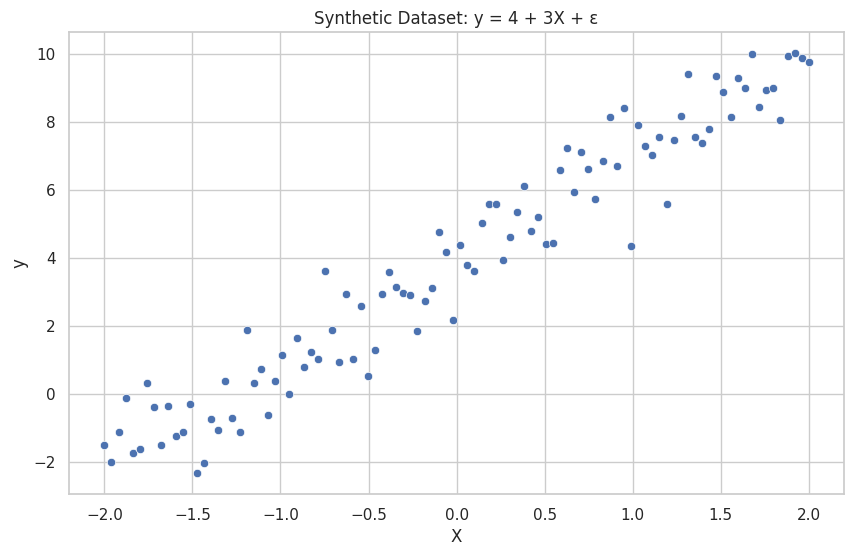

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['X'], y=data['y'])
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Dataset: y = 4 + 3X + ε')
plt.show()

-   Split the dataset into training and testing data (80% / 20%)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'],
                                                    test_size=0.2,
                                                    random_state=42)

-   Create and fit a simple linear regression model

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept (β0): {model.intercept_:.2f}")
print(f"Slope (β1): {model.coef_[0]:.2f}")

Intercept (β0): 3.88
Slope (β1): 3.03


-   Make predictions and evaluate the model

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 0.60
Mean Squared Error (MSE): 0.62
Root Mean Squared Error (RMSE): 0.79
R-squared (R^2): 0.95


-   Plot the results

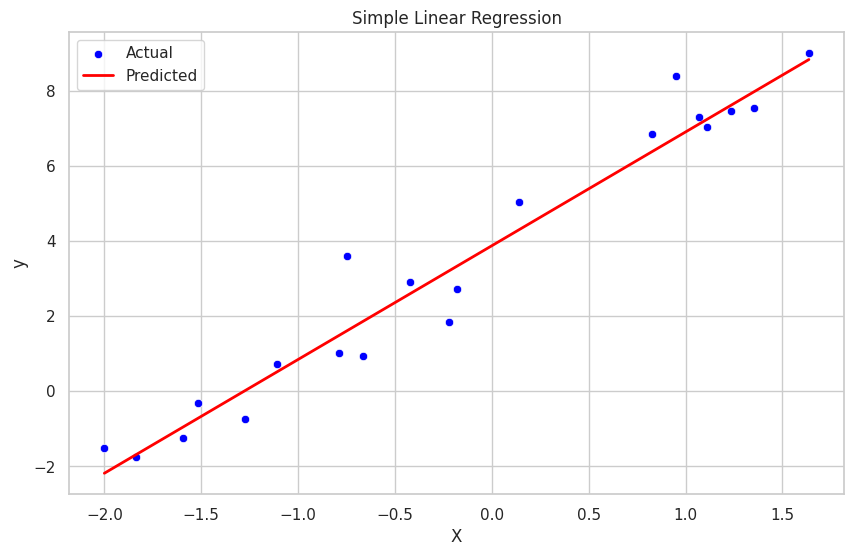

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Hands-on Exercises

-   **Exercise 1**: Generate a synthetic dataset with a linear relationship between the independent and dependent variables. Use the following parameters:
    -   Independent variable: $X$ (uniformly distributed between 0 and 10)
    -   Dependent variable: $y = 2X + 5 + \varepsilon$, where $\varepsilon$ is normally distributed noise.
    -   Split the dataset into training and testing sets (80% training, 20% testing).

In [11]:
# Generate synthetic dataset
np.random.seed(42)
X = 10 * np.random.rand(100, 1)  # Independent variable
y = 2 * X + 5 + np.random.randn(100, 1)  # Dependent variable with noise

# Create DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'],
                                                    test_size=0.2,
                                                    random_state=42)

-   **Exercise 2**: Fit a simple linear regression model to the training data and evaluate its performance using the following metrics:
    -   Mean Absolute Error (MAE)
    -   Mean Squared Error (MSE)
    -   Root Mean Squared Error (RMSE)
    -   R-squared ($R^2$)

In [12]:
# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 0.65
Root Mean Squared Error (RMSE): 0.81
R-squared (R^2): 0.98


-   **Exercise 3**: Visualize the results by plotting the actual vs. predicted values on a scatter plot.

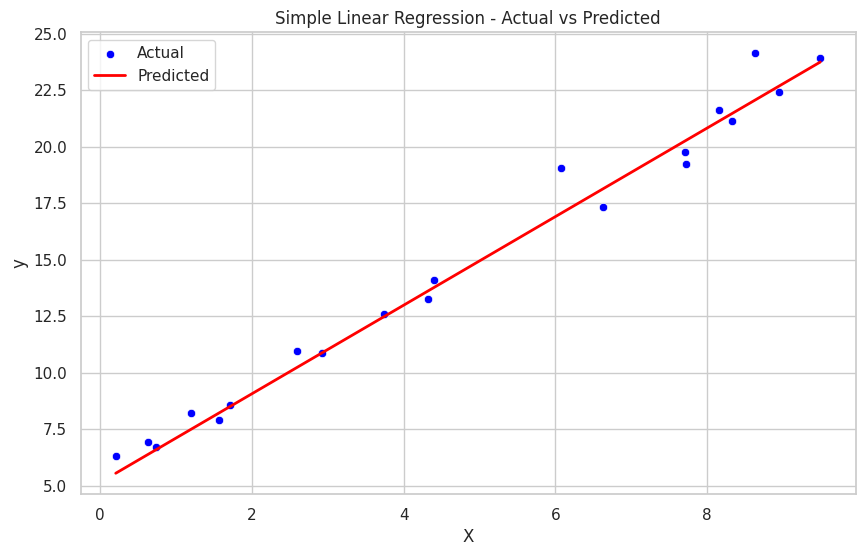

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

-   **Exercise 4**: Explore the impact of outliers on the performance of the simple linear regression model.

Mean Absolute Error (MAE): 7.41
Mean Squared Error (MSE): 197.19
Root Mean Squared Error (RMSE): 14.04
R-squared (R^2): 0.30


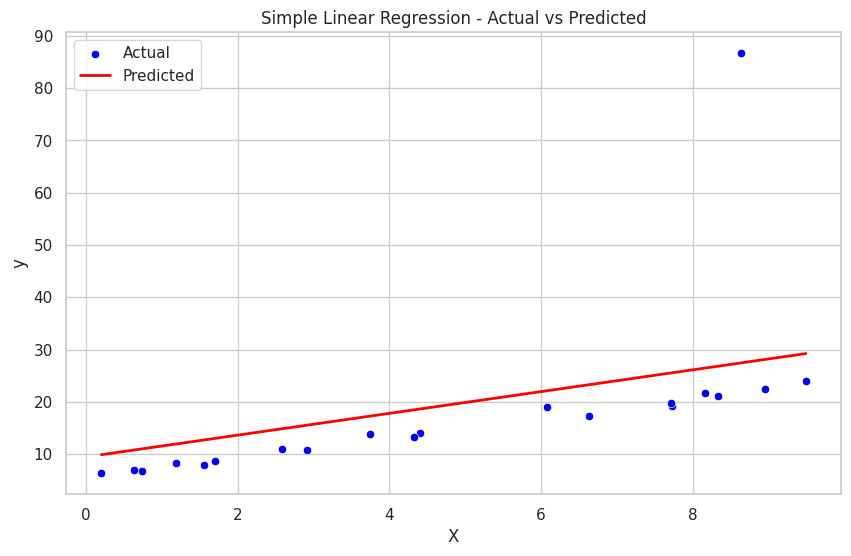

In [14]:
np.random.seed(42)
# Generate a dataset with outliers
X = 10 * np.random.rand(100, 1)  # Independent variable
y = 2 * X + 5 + np.random.randn(100, 1)  # Dependent variable with noise

# Introduce outliers
y[::20] += 100 * np.random.randn(5, 1)  # Add large noise to every 20th point

# Create DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'],
                                                    test_size=0.2,
                                                    random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.squeeze(), y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze(), y=y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression - Actual vs Predicted')
plt.legend()
plt.show()

-   **Exercise 5**: Implement a function that takes in the independent and dependent variables, fits a simple linear regression model, and returns the evaluation metrics. Use this function to evaluate different synthetic datasets with varying noise levels.

In [15]:
def evaluate_simple_linear_regression(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = float(np.sqrt(mse))
    r2 = r2_score(y_test, y_pred)

    return mae, mse, rmse, r2

# Example usage with different noise levels
noise_levels = [0.1, 1.0, 5.0]
for noise in noise_levels:
    X = 10 * np.random.rand(100, 1)  # Independent variable
    y = 2 * X + 5 + noise * np.random.randn(100, 1)  # Dependent variable with varying noise
    df = pd.DataFrame(np.hstack((X, y)), columns=['X', 'y'])
    metrics = evaluate_simple_linear_regression(df[['X']], df[['y']])
    print(f"Noise level: {noise}, Metrics: {metrics}")

Noise level: 0.1, Metrics: (0.060194149099218296, 0.005214607031248922, 0.07221223602166688, 0.9998207908794612)
Noise level: 1.0, Metrics: (0.651759296479477, 0.5335195182655126, 0.730424204326166, 0.987900554863308)
Noise level: 5.0, Metrics: (3.8813180869516657, 22.589545022391185, 4.75284599186542, 0.48918651066956254)


## Summary

In this section, we introduced simple linear regression, a fundamental technique in machine learning for modeling the relationship between a dependent variable and a single independent variable. We demonstrated how to implement simple linear regression using Python's `scikit-learn` library and evaluated the model's performance using various metrics. Simple linear regression serves as a foundation for understanding more complex regression techniques and is widely used in many.